<a href="https://colab.research.google.com/github/Mennatullah61/DEPI-Final-Project/blob/RFM-Analysis-and-segmentation/RFM_Analysis_and_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [ ]:
rfm_trans = pd.read_csv('/content/RFM_Transaction.csv')
all_customers = pd.read_csv('all_customers.csv')

In [ ]:
all_customers_with_transactions = pd.merge(all_customers, rfm_trans, on='customer_id')

all_customers_with_transactions


,customer_id,name,age,gender,past_3_years_bike_related_purchases,categorized_job_title,job_industry_category,wealth_segment,owns_car,tenure,...,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,Laraine Medendorp,64.0,Female,93,Administrative Roles,Health,Mass Customer,Yes,11.0,...,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,2005-05-10
1,1,Laraine Medendorp,64.0,Female,93,Administrative Roles,Health,Mass Customer,Yes,11.0,...,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,2008-03-19
2,1,Laraine Medendorp,64.0,Female,93,Administrative Roles,Health,Mass Customer,Yes,11.0,...,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,2003-07-21
3,1,Laraine Medendorp,64.0,Female,93,Administrative Roles,Health,Mass Customer,Yes,11.0,...,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,2003-09-09
4,1,Laraine Medendorp,64.0,Female,93,Administrative Roles,Health,Mass Customer,Yes,11.0,...,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2005-08-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19166,3500,Josy Fleeman,50.0,Female,71,unknown,Entertainment,Affluent Customer,No,17.0,...,2017-01-09,1.0,Approved,Giant Bicycles,Road,medium,medium,792.90,594.68,1992-10-02
19167,3500,Josy Fleeman,50.0,Female,71,unknown,Entertainment,Affluent Customer,No,17.0,...,2017-02-16,0.0,Approved,WeareA2B,Standard,medium,medium,1228.07,400.91,2000-05-22
19168,3500,Josy Fleeman,50.0,Female,71,unknown,Entertainment,Affluent Customer,No,17.0,...,2017-08-08,0.0,Approved,Giant Bicycles,Standard,medium,small,1311.44,1167.18,1992-10-11
19169,3500,Josy Fleeman,50.0,Female,71,unknown,Entertainment,Affluent Customer,No,17.0,...,2017-01-11,0.0,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,1993-07-15


In [ ]:
all_customers_with_transactions.isnull().sum()

,0
customer_id,0
name,0
age,0
gender,0
past_3_years_bike_related_purchases,0
categorized_job_title,0
job_industry_category,0
wealth_segment,0
owns_car,0
tenure,0


In [ ]:
all_customers_with_transactions['order_status'].value_counts()

,count
order_status,
Approved,19001
Cancelled,170


In [ ]:
all_customers_with_transactions.drop(all_customers_with_transactions[all_customers_with_transactions['order_status']=='Cancelled'].index, inplace=True)
all_customers_with_transactions['order_status'].value_counts()

,count
order_status,
Approved,19001


In [ ]:
all_customers_with_transactions['transaction_date'] = pd.to_datetime(all_customers_with_transactions['transaction_date'])

last_trans = pd.to_datetime('2017-12-31')

recency_df = all_customers_with_transactions.groupby('customer_id').agg(
    {'transaction_date': lambda x: (last_trans - x.max()).days}).reset_index().rename(columns={'transaction_date': 'recency'})

recency_df

,customer_id,recency
0,1,8
1,2,129
2,4,196
3,5,17
4,6,65
...,...,...
3405,3496,257
3406,3497,53
3407,3498,128
3408,3499,52


In [ ]:
frequency_df = all_customers_with_transactions.groupby('customer_id').agg({
    'transaction_date': 'count'}).reset_index().rename(columns={'transaction_date': 'frequency'})

frequency_df

,customer_id,frequency
0,1,11
1,2,3
2,4,2
3,5,6
4,6,5
...,...,...
3405,3496,4
3406,3497,3
3407,3498,6
3408,3499,7


In [ ]:
monetary_df = all_customers_with_transactions.groupby('customer_id').agg({
    'list_price': 'sum'}).reset_index().rename(columns={'list_price': 'monetary'})

monetary_df

,customer_id,monetary
0,1,9084.45
1,2,4149.07
2,4,1047.72
3,5,5903.20
4,6,5931.69
...,...,...
3405,3496,4725.38
3406,3497,3744.07
3407,3498,5177.06
3408,3499,7673.48


In [ ]:
rfm_df = recency_df.merge(frequency_df, on='customer_id').merge(monetary_df, on='customer_id')
rfm_df

,customer_id,recency,frequency,monetary
0,1,8,11,9084.45
1,2,129,3,4149.07
2,4,196,2,1047.72
3,5,17,6,5903.20
4,6,65,5,5931.69
...,...,...,...,...
3405,3496,257,4,4725.38
3406,3497,53,3,3744.07
3407,3498,128,6,5177.06
3408,3499,52,7,7673.48


In [ ]:

rfm_df['R_rank'] = pd.qcut(rfm_df['recency'], 10, labels=range(10, 0, -1))
rfm_df['F_rank'] = pd.qcut(rfm_df['frequency'], 10, labels=False, duplicates='drop') + 1
rfm_df['M_rank'] = pd.qcut(rfm_df['monetary'], 10, labels=range(1, 11))

In [ ]:
rfm_df

,customer_id,recency,frequency,monetary,R_rank,F_rank,M_rank
0,1,8,11,9084.45,10,7,9
1,2,129,3,4149.07,2,1,3
2,4,196,2,1047.72,1,1,1
3,5,17,6,5903.20,8,4,6
4,6,65,5,5931.69,4,3,6
...,...,...,...,...,...,...,...
3405,3496,257,4,4725.38,1,2,4
3406,3497,53,3,3744.07,5,1,3
3407,3498,128,6,5177.06,2,4,5
3408,3499,52,7,7673.48,5,5,8


In [ ]:
rfm_df['RFM_Score'] = rfm_df[['R_rank', 'F_rank', 'M_rank']].sum(axis=1)

In [ ]:
def segment_customer(rfm_score):
    if rfm_score >= 25:
        return 'Best Customers'
    elif rfm_score >= 20:
        return 'Loyal Customers'
    elif rfm_score >= 15:
        return 'Potential Loyalist'
    elif rfm_score >= 10:
        return 'At Risk'
    else:
        return 'Lost Customers'

rfm_df['segment'] = rfm_df['RFM_Score'].apply(segment_customer)

In [ ]:
rfm_summary = rfm_df.groupby('segment').agg({
    'customer_id': 'count',
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean'
}).reset_index()

rfm_summary

,segment,customer_id,recency,frequency,monetary
0,At Risk,900,65.305556,4.676667,4978.694122
1,Best Customers,162,8.154321,9.592593,11374.135123
2,Lost Customers,778,128.726221,3.083548,3118.172224
3,Loyal Customers,645,24.984496,7.956589,9173.846372
4,Potential Loyalist,925,43.575135,6.169730,6850.302162


In [ ]:
# Convert the 'R_rank', 'F_rank', and 'M_rank' columns to a numeric dtype
rfm_df['R_rank'] = rfm_df['R_rank'].astype(int)
rfm_df['F_rank'] = rfm_df['F_rank'].astype(int)
rfm_df['M_rank'] = rfm_df['M_rank'].astype(int)

# Now you should be able to calculate the RFM score
rfm_df['RFM_Score'] = rfm_df['R_rank'] + rfm_df['F_rank'] + rfm_df['M_rank']

rfm_df

,customer_id,recency,frequency,monetary,R_rank,F_rank,M_rank,RFM_Score,segment
0,1,8,11,9084.45,10,7,9,26,Best Customers
1,2,129,3,4149.07,2,1,3,6,Lost Customers
2,4,196,2,1047.72,1,1,1,3,Lost Customers
3,5,17,6,5903.20,8,4,6,18,Potential Loyalist
4,6,65,5,5931.69,4,3,6,13,At Risk
...,...,...,...,...,...,...,...,...,...
3405,3496,257,4,4725.38,1,2,4,7,Lost Customers
3406,3497,53,3,3744.07,5,1,3,9,Lost Customers
3407,3498,128,6,5177.06,2,4,5,11,At Risk
3408,3499,52,7,7673.48,5,5,8,18,Potential Loyalist


In [ ]:
rfm_trans['customer_id'].max()

5034

In [ ]:
rfm_trans[rfm_trans['customer_id']==5034]

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
8559,0,5034,2017-10-07,0.0,Approved,Solex,Road,medium,medium,416.98,312.735016,2015-08-02
16393,0,5034,2017-01-27,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.299988,1997-08-25
17146,0,5034,2017-01-03,0.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.400024,1992-10-02


In [ ]:
rfm_trans.isnull().sum()

,0
product_id,0
customer_id,0
transaction_date,0
online_order,0
order_status,0
brand,195
product_line,195
product_class,195
product_size,195
list_price,0


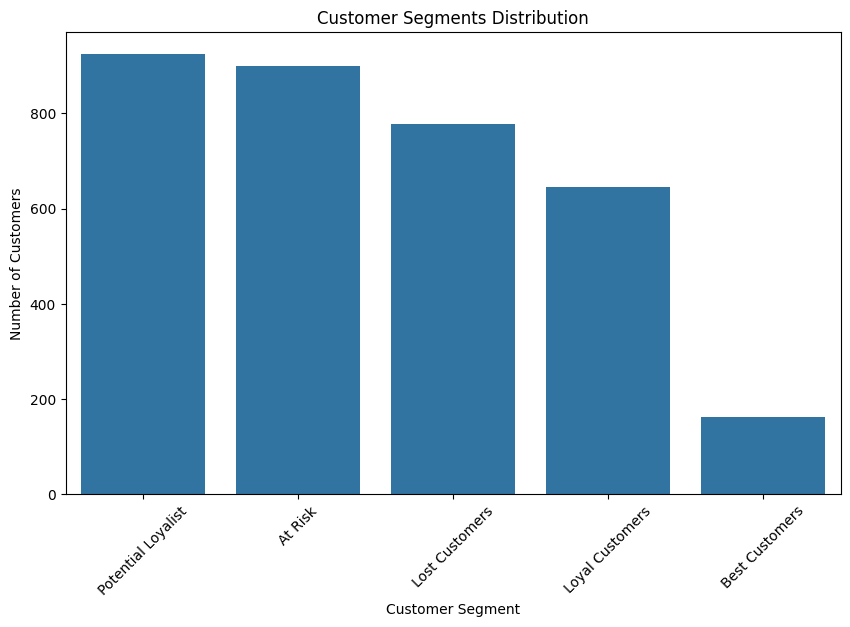

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='segment', data=rfm_df, order=rfm_df['segment'].value_counts().index)
plt.title('Customer Segments Distribution')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

In [ ]:
rfm_df

,customer_id,recency,frequency,monetary,R_rank,F_rank,M_rank,RFM_Score,segment
0,1,8,11,9084.45,10,7,9,26,Best Customers
1,2,129,3,4149.07,2,1,3,6,Lost Customers
2,4,196,2,1047.72,1,1,1,3,Lost Customers
3,5,17,6,5903.20,8,4,6,18,Potential Loyalist
4,6,65,5,5931.69,4,3,6,13,At Risk
...,...,...,...,...,...,...,...,...,...
3405,3496,257,4,4725.38,1,2,4,7,Lost Customers
3406,3497,53,3,3744.07,5,1,3,9,Lost Customers
3407,3498,128,6,5177.06,2,4,5,11,At Risk
3408,3499,52,7,7673.48,5,5,8,18,Potential Loyalist


In [ ]:
from sklearn.cluster import KMeans

# Assuming you've scaled your RFM data
kmeans = KMeans(n_clusters=4)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_df[['R_rank', 'F_rank', 'M_rank']])

# Preview the clustered data
print(rfm_df[['R_rank', 'F_rank', 'M_rank', 'Cluster']].head())


   R_rank  F_rank  M_rank  Cluster
0      10       7       9        3
1       2       1       3        1
2       1       1       1        1
3       8       4       6        2
4       4       3       6        0


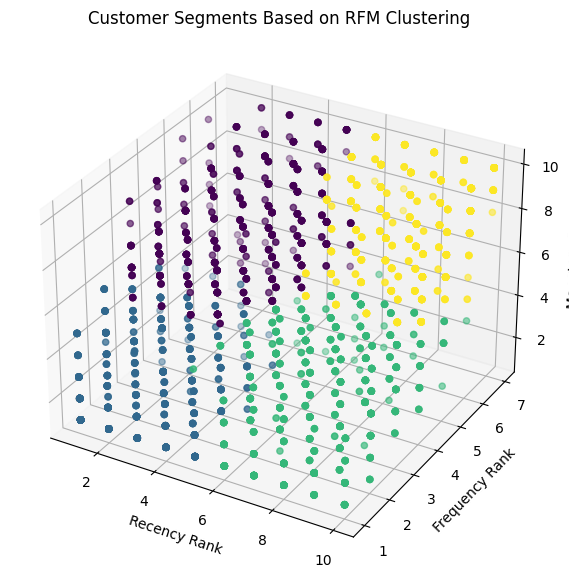

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# 3D scatter plot for RFM clusters
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(rfm_df['R_rank'], rfm_df['F_rank'], rfm_df['M_rank'], c=rfm_df['Cluster'], cmap='viridis', marker='o')

ax.set_xlabel('Recency Rank')
ax.set_ylabel('Frequency Rank')
ax.set_zlabel('Monetary Rank')

plt.title('Customer Segments Based on RFM Clustering')
plt.show()

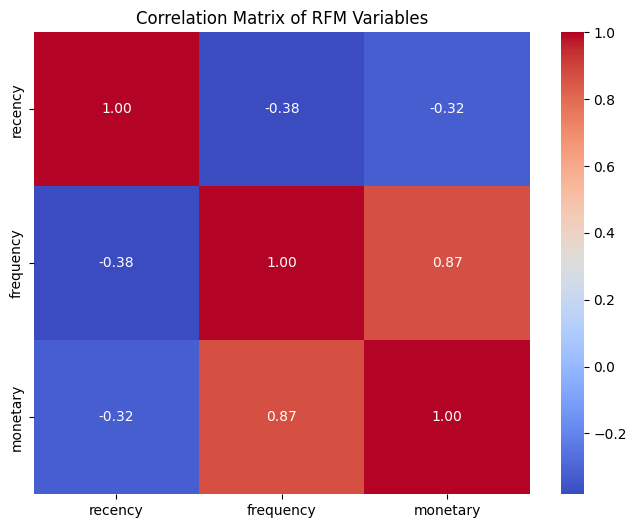

In [ ]:
correlation_matrix = rfm_df[['recency', 'frequency', 'monetary']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of RFM Variables')
plt.show()


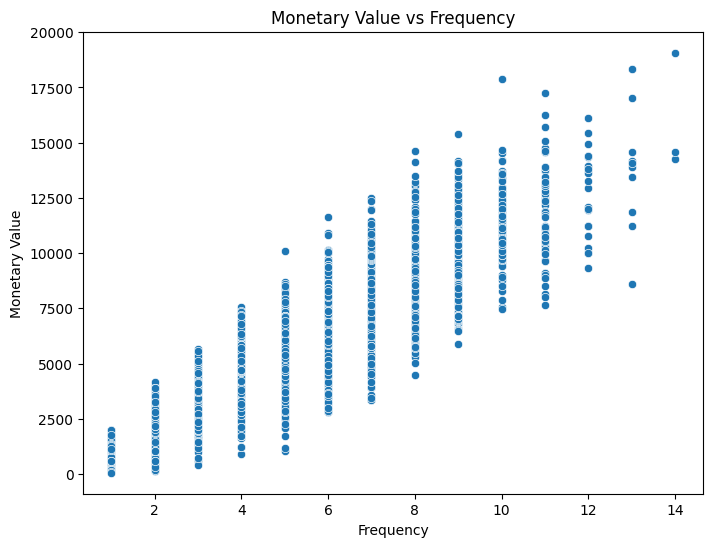

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='frequency', y='monetary', data=rfm_df)
plt.title('Monetary Value vs Frequency')
plt.xlabel('Frequency')
plt.ylabel('Monetary Value')
plt.show()


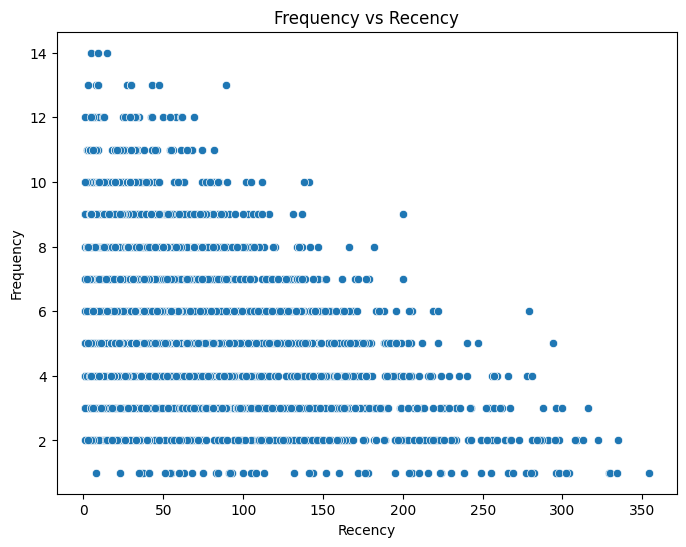

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='recency', y='frequency', data=rfm_df)
plt.title('Frequency vs Recency')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()


In [ ]:
from google.colab import files

rfm_df.to_csv('RFM_Analysis.csv', index=False)
files.download('RFM_Analysis.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
rfm_scores_transactions = pd.merge(all_customers_with_transactions, rfm_df, on='customer_id')
rfm_scores_transactions.columns

Index(['customer_id', 'name', 'age', 'gender',
       'past_3_years_bike_related_purchases', 'categorized_job_title',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure',
       'postcode', 'state', 'property_valuation', 'product_id',
       'transaction_date', 'online_order', 'order_status', 'brand',
       'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'product_first_sold_date', 'recency', 'frequency',
       'monetary', 'R_rank', 'F_rank', 'M_rank', 'RFM_Score', 'segment',
       'Cluster'],
      dtype='object')

In [ ]:
# from google.colab import files

# rfm_scores_transactions.to_csv('rfm_scores_transactions.csv', index=False)
# files.download('rfm_scores_transactions.csv')

In [ ]:
import sqlite3
import pandas as pd

conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

rfm_df.to_sql('rfm_df', conn, index=False, if_exists='replace')

3410

In [ ]:
query = """
SELECT *
FROM rfm_df
WHERE segment = 'Best Customers'
LIMIT 10;
"""

result = pd.read_sql_query(query, conn)

result

,customer_id,recency,frequency,monetary,R_rank,F_rank,M_rank,RFM_Score,segment,Cluster
0,1,8,11,9084.45,10,7,9,26,Best Customers,3
1,25,6,12,9996.33,10,7,9,26,Best Customers,3
2,37,8,9,11291.71,10,6,10,26,Best Customers,3
3,89,5,9,12741.44,10,6,10,26,Best Customers,3
4,109,9,10,10661.51,9,7,10,26,Best Customers,3
5,117,6,10,12856.83,10,7,10,27,Best Customers,3
6,142,5,11,12474.74,10,7,10,27,Best Customers,3
7,151,1,8,13047.54,10,6,10,26,Best Customers,3
8,172,12,8,10150.14,9,6,10,25,Best Customers,3
9,174,12,10,12893.57,9,7,10,26,Best Customers,3


In [ ]:
query = """
SELECT *
FROM rfm_df
WHERE RFM_Score >=27
LIMIT 10;
"""

result = pd.read_sql_query(query, conn)

result

,customer_id,recency,frequency,monetary,R_rank,F_rank,M_rank,RFM_Score,segment,Cluster
0,117,6,10,12856.83,10,7,10,27,Best Customers,3
1,142,5,11,12474.74,10,7,10,27,Best Customers,3
2,322,2,11,14770.22,10,7,10,27,Best Customers,3
3,377,7,12,10221.02,10,7,10,27,Best Customers,3
4,577,3,11,10515.00,10,7,10,27,Best Customers,3
5,637,8,13,13899.73,10,7,10,27,Best Customers,3
6,725,4,11,13048.82,10,7,10,27,Best Customers,3
7,793,2,10,12116.11,10,7,10,27,Best Customers,3
8,1068,5,14,14254.55,10,7,10,27,Best Customers,3
9,1084,5,10,11206.14,10,7,10,27,Best Customers,3


In [ ]:
query = """
SELECT customer_id, RFM_Score, segment
FROM rfm_df
WHERE RFM_Score < 20
ORDER BY monetary DESC
LIMIT 10;
"""

result = pd.read_sql_query(query, conn)

result


,customer_id,RFM_Score,segment
0,1992,19,Potential Loyalist
1,1887,18,Potential Loyalist
2,3212,19,Potential Loyalist
3,2894,19,Potential Loyalist
4,34,18,Potential Loyalist
5,1043,18,Potential Loyalist
6,1093,19,Potential Loyalist
7,565,19,Potential Loyalist
8,2885,19,Potential Loyalist
9,473,18,Potential Loyalist


In [ ]:
query = """
SELECT *
FROM rfm_df
WHERE F_rank <= 3
AND M_rank >= 8
LIMIT 10;
"""

result = pd.read_sql_query(query, conn)

result


,customer_id,recency,frequency,monetary,R_rank,F_rank,M_rank,RFM_Score,segment,Cluster
0,16,100,5,7763.79,3,3,8,14,At Risk,0
1,189,4,5,8633.69,10,3,9,22,Loyal Customers,3
2,257,93,5,7616.05,3,3,8,14,At Risk,0
3,569,99,4,7560.33,3,2,8,13,At Risk,0
4,782,26,5,8440.67,7,3,8,18,Potential Loyalist,3
5,866,99,5,7599.92,3,3,8,14,At Risk,0
6,909,190,5,8560.51,1,3,9,13,At Risk,0
7,933,1,5,7598.65,10,3,8,21,Loyal Customers,3
8,1005,160,5,7863.76,1,3,8,12,At Risk,0
9,1022,84,5,8161.40,3,3,8,14,At Risk,0
